# Importing Necessary Libraries

In [8]:
#Data AnALYSIS
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt

#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

#warnings
import warnings
warnings.filterwarnings('ignore')


#Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
!ls

gdrive	sample_data


In [9]:
#Loading the data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DigitalSkola/Week 12/dataset for unsupervised learning/Mall_Customers.csv')
print(f'Shape of the data:{df.shape}')
df.head()

Shape of the data:(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Duplicates check
df.duplicated().sum()

0

Theres no duplicates in the data

In [12]:
# Data Type check
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
#Numerical variable description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
#Categorical variable description
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

The range of data can be observed to be reasonable

In [17]:
#Missing values check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the data

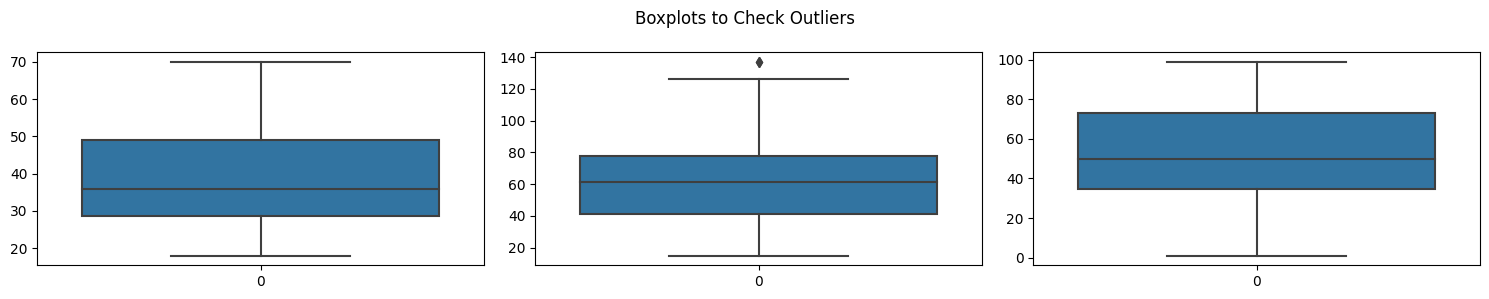

In [19]:
#outliers check
fig, axs = plt.subplots(1 ,3, figsize=(15,3))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

There are no significant outliers.
Considering all the above result, there is no need of data cleaning

#Data Visualization

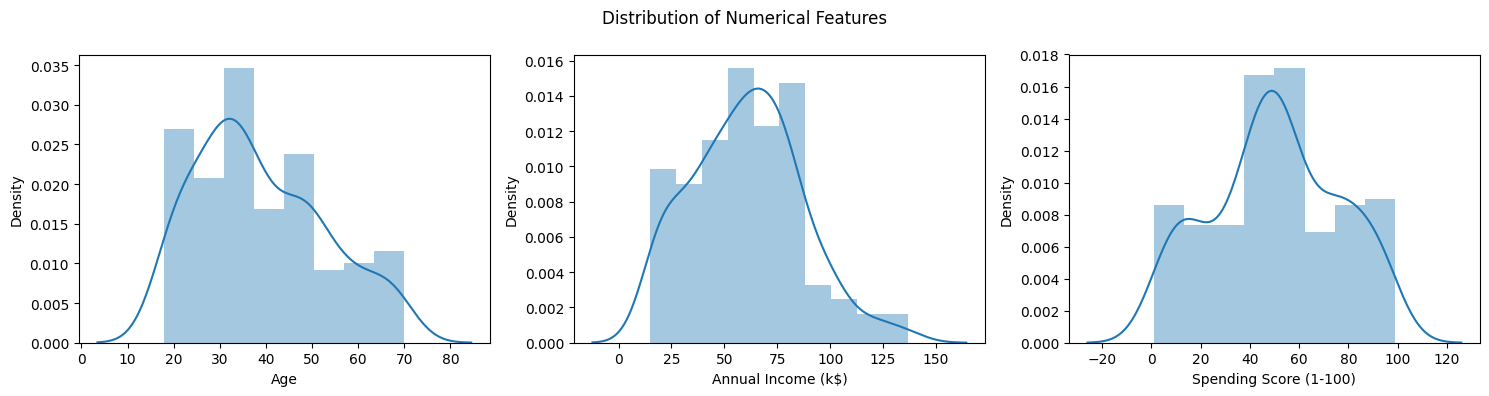

In [25]:
#Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

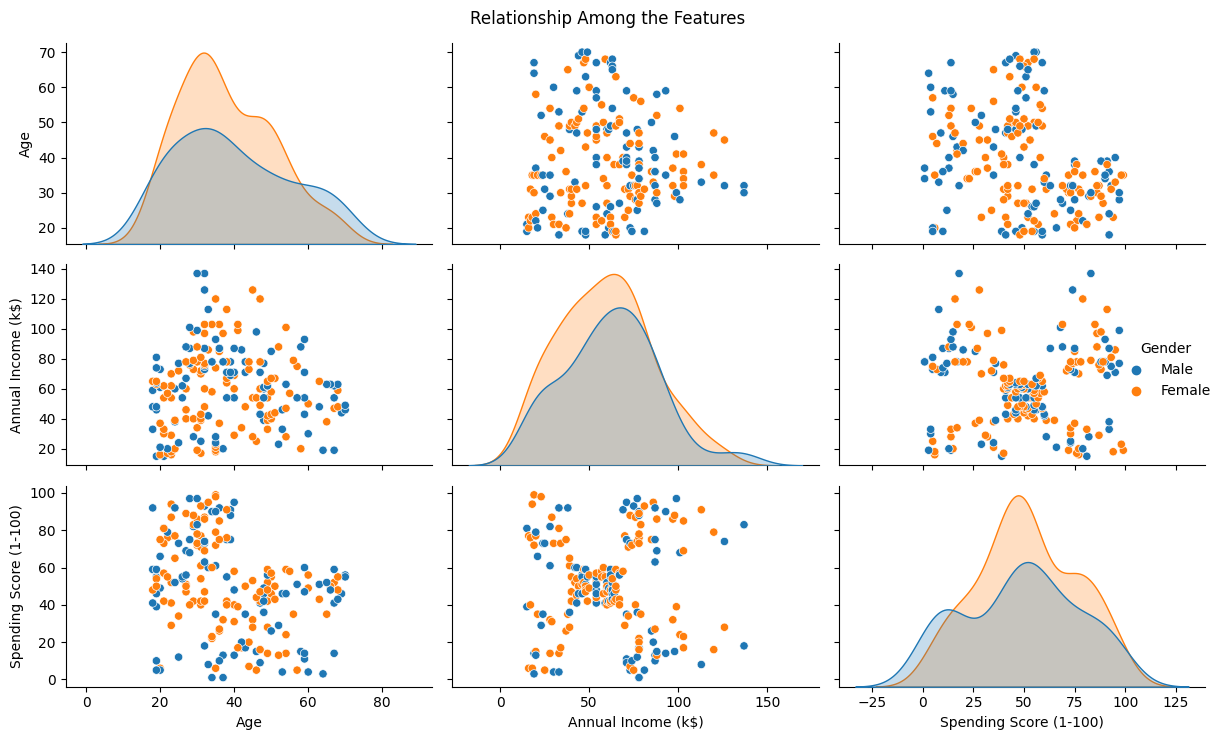

In [23]:
# Relationship among the features
sns.pairplot(df.drop('CustomerID',axis=1), hue='Gender',aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [26]:
# Feature Selection
df_fs = df.drop(columns='CustomerID')

# Label Encoding
df_encoded = df_fs.replace({'Gender':{'Female':0,'Male':1}})

# Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded)

X[:5, :]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

#Modeling

we will use K-means Clustering and Hierarchical Clustering algorithms

#K-Means Clustering

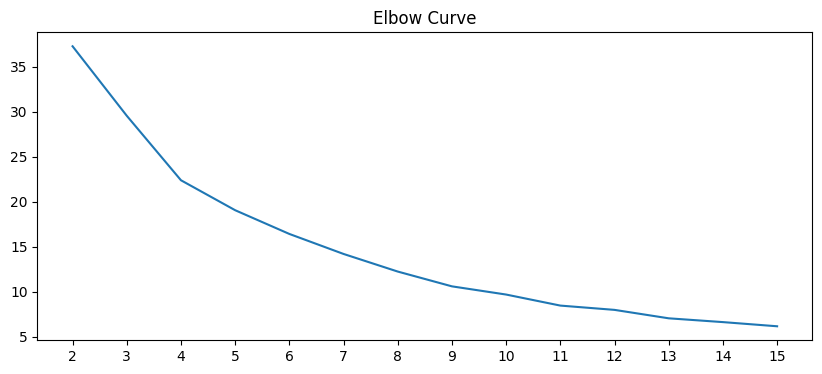

In [27]:
#Elbow Method to identify optimum no. of clusters (Elbow Method paling sering digunakan)
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters,inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

Considering the above elbow curve, 4 number of clusters will be an optimum choice

kalo di lihat saat df.describe() nilai min max dari kolom age, anual income dan spending score itu tidak terlalu jauh gep nya jadi sebenarnya tidak perlu minmax scaler, dan perintah min max scaler dihapus maka grafik diatas range angka x dan y angka tinggi contoh diatas 20000 an mengikuti kesesuaian data

In [37]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['cluster'] = kmeans.labels_
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


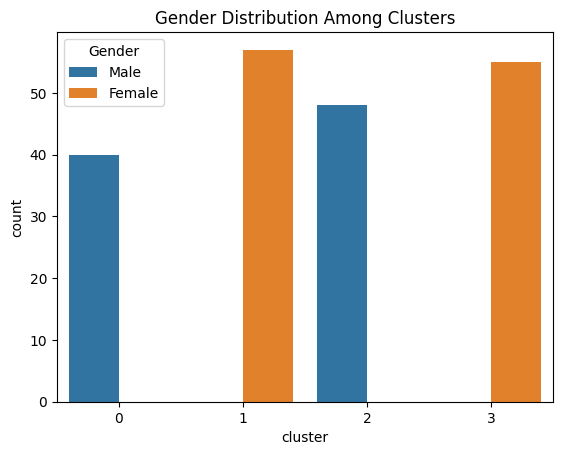

In [31]:
#Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

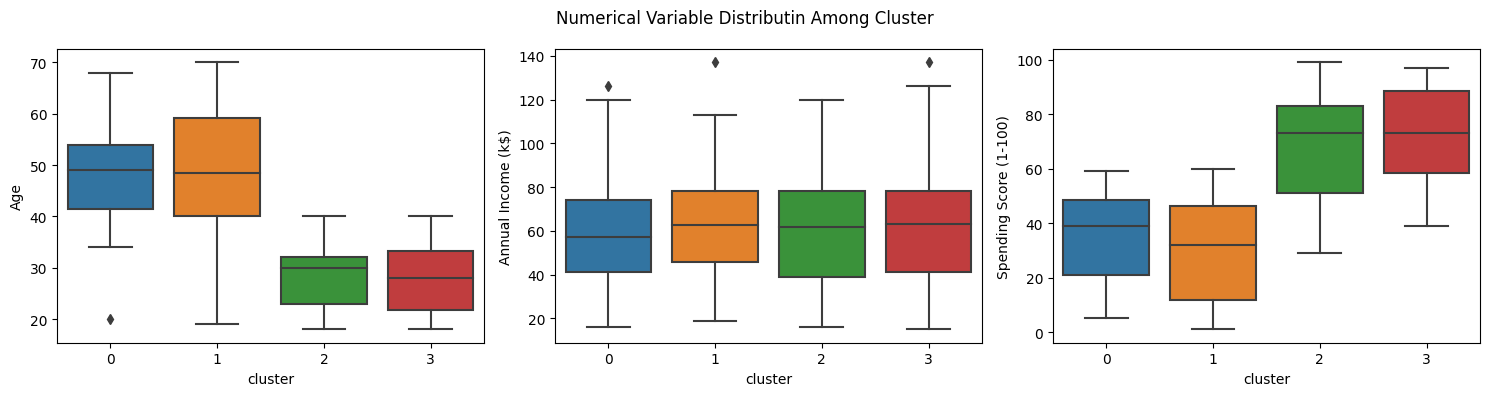

In [38]:
#Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distributin Among Cluster')
plt.tight_layout()
plt.show()

Cluster Insight:
All the clusters have almost identical annual income distributions. So, let us analyze customers clusters basen on gender, age, and spending score.<br>
Cluster 0:High Customers female with low spending score,<br>
Cluster 1:High Custoemrs males with high spending score and high age <br>
Cluster 2:Low Customers females with high spending score and medium annual income<br>
Cluster 3:Low Customers males with high spending score and low annual income<br>

#Hierarchical Clustering

There are two types of fierarchical clustering: Agglomerative and Divisive. We will use Agglomerative Hierarchical Clustering

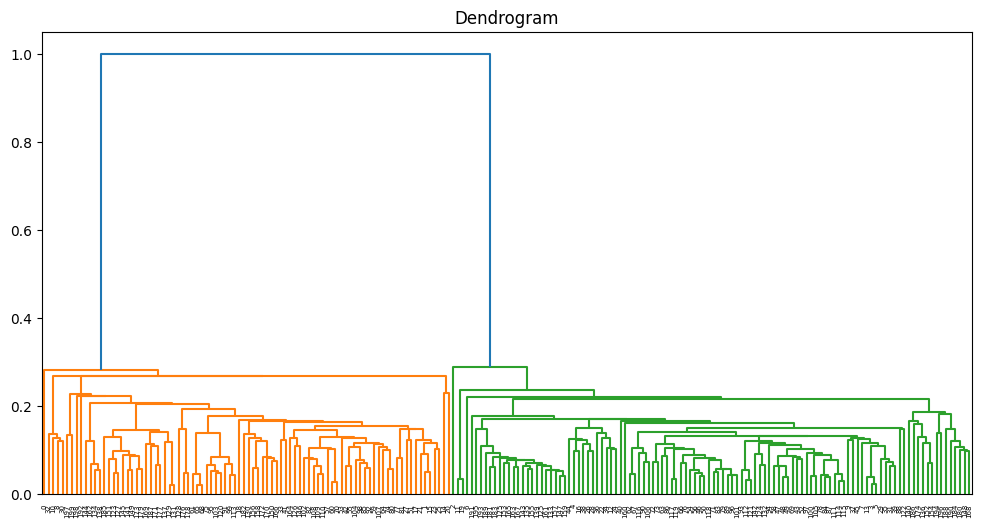

In [43]:
# Plotting dendrogram to identify optimum no. of Clusters
mergings = linkage(X, method='single') # bisa pakai ward
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r',linestyle='--')
plt.title('Dendrogram')
plt.show()

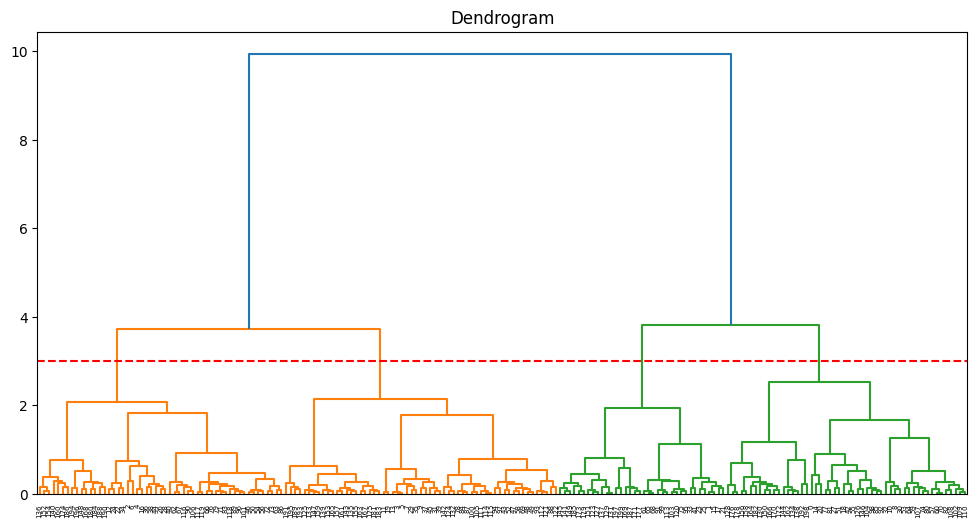

In [44]:
# Plotting dendrogram to identify optimum no. of Clusters
mergings = linkage(X, method='ward') # bisa pakai ward
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r',linestyle='--')
plt.title('Dendrogram')
plt.show()

In [45]:
# Agglomerative clustering with 4 clusters
aggclust = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
aggclust.fit(X)

# Labeling the data
df_agg = df.copy()
df_agg['cluster'] = aggclust.labels_
df_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


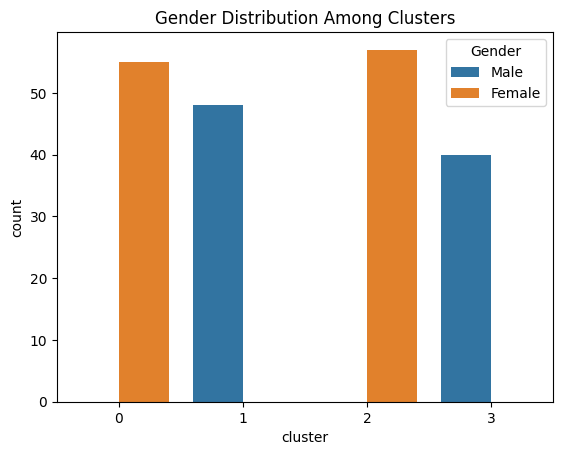

In [46]:
#Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

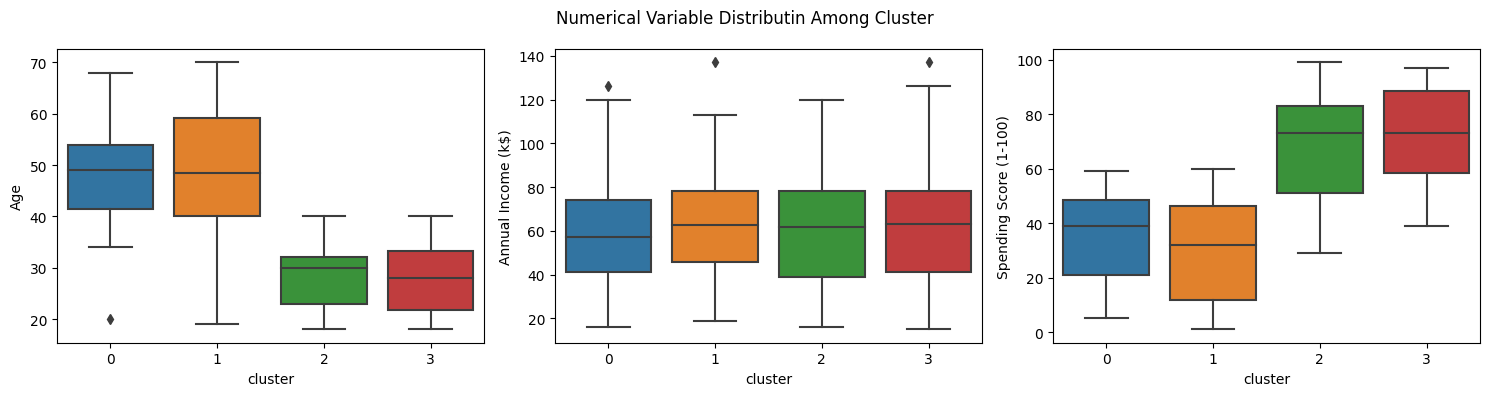

In [47]:
#Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distributin Among Cluster')
plt.tight_layout()
plt.show()